In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('../input/ts-course-data/book_sales.csv')
data.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [31]:
data.drop(columns='Paperback', inplace= True)

In [32]:
data['time_step'] = np.arange(len(data))
data.head()

,Date,Hardcover,time_step
0,2000-04-01,139,0
1,2000-04-02,128,1
2,2000-04-03,172,2
3,2000-04-04,139,3
4,2000-04-05,191,4


<AxesSubplot:xlabel='time_step', ylabel='Hardcover'>

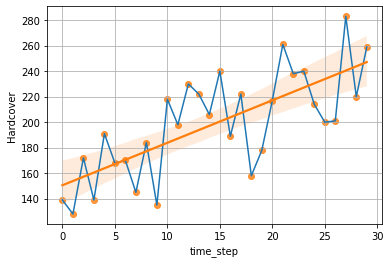

In [33]:
plt.grid()
sns.lineplot(x='time_step',y='Hardcover', data=data)
sns.regplot(x='time_step',y='Hardcover', data=data)

Sales are increasing towards the later part of month

In [34]:
data.drop(columns='time_step',inplace=True)
data['lag_1'] = data['Hardcover'].shift(1)
data = data.reindex(columns=['Hardcover','lag_1'])

data.head()

,Hardcover,lag_1
0,139,NaN
1,128,139.0
2,172,128.0
3,139,172.0
4,191,139.0


In [35]:
data.fillna(0, inplace=True)

Text(0.5, 1.0, 'Time lag plot of Hardcover sales')

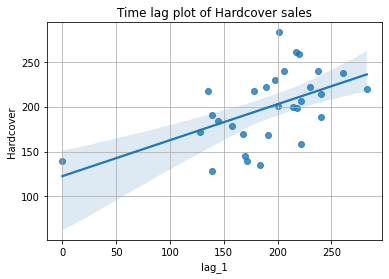

In [36]:
fig, ax = plt.subplots()
ax.grid()
ax = sns.regplot(x='lag_1', y='Hardcover', data=data)
ax.set_title('Time lag plot of Hardcover sales')

Monotonously increasing lag plot means sales on next day is higher than that on previous day